**AUTHOR** : Prasansha Satpathy<br>


**CLUSTERING ALGORITHMS**

In [211]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn.cluster import *
from sklearn.mixture import *
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/kaggle/input/wine-pca/Wine.csv


Let's start with a artificial samples

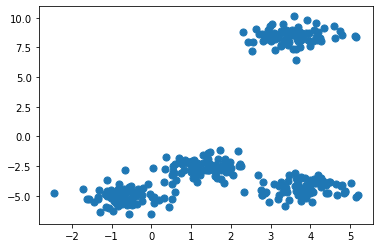

In [212]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,  n_features = 2, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], s=50);

The example below provides insights on how the data distribution of resulting clusters may be present after the fitting and how can it affect the results...

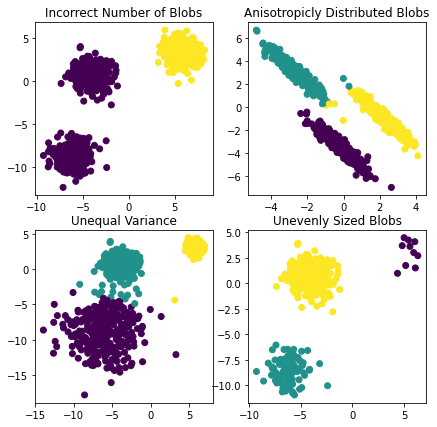

In [213]:
plt.figure(figsize=(7, 7))

n_samples = 1000
random_state = 17


X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")




# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c = y_pred)
plt.title("Anisotropicly Distributed Blobs")




# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")



# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

#SOURCE : SKLEARN DOC

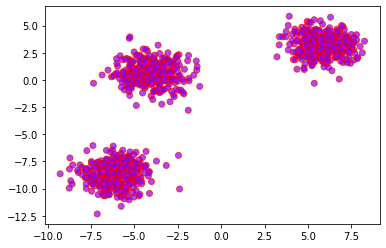

In [214]:
ms = MeanShift()
ms.fit(X)
cluster_centers = ms.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='r')

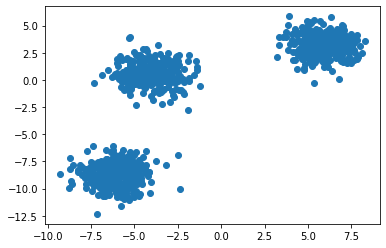

In [215]:
spectral_model_rbf = SpectralClustering(affinity ='rbf')
  
# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X)
plt.scatter(X[:,0], X[:,1])

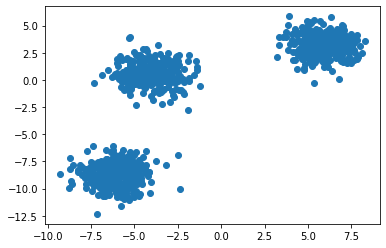

In [216]:
brc = Birch(branching_factor=50, n_clusters=None, threshold=1.5)
brc.fit(X)
plt.scatter(X[:,0], X[:,1])

**Lets start with training from a real dataset...**
Here I have taken a Wine quality dataset.

In [217]:
df = pd.read_csv("../input/wine-pca/Wine.csv")

In [218]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [219]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [220]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

<Figure size 1152x432 with 0 Axes>

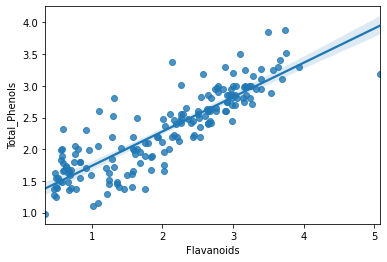

<Figure size 1152x432 with 0 Axes>

In [221]:
sns.regplot(x="Flavanoids",y="Total_Phenols",data=df)
plt.figure(figsize=(16,6))

**K - MEAN**

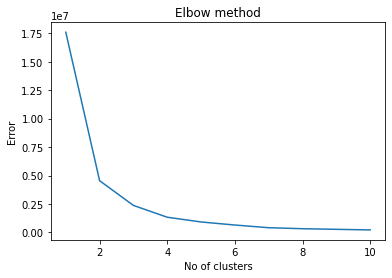

In [222]:
X = df.iloc[:,1:].values
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [223]:
K = KMeans(n_clusters = 3).fit(X)
y = K.fit_predict(X)

In [224]:
K.cluster_centers_

array([[1.88340426e+00, 2.42617021e+00, 1.70234043e+01, 1.05510638e+02,
        2.86723404e+00, 3.01425532e+00, 2.85319149e-01, 1.91042553e+00,
        5.70255319e+00, 1.07829787e+00, 3.11404255e+00, 1.19514894e+03,
        1.02127660e+00],
       [2.49420290e+00, 2.28855072e+00, 2.08231884e+01, 9.23478261e+01,
        2.07072464e+00, 1.75840580e+00, 3.90144928e-01, 1.45188406e+00,
        4.08695651e+00, 9.41159420e-01, 2.49072464e+00, 4.58231884e+02,
        2.27536232e+00],
       [2.50403226e+00, 2.40806452e+00, 1.98903226e+01, 1.03596774e+02,
        2.11112903e+00, 1.58403226e+00, 3.88387097e-01, 1.50338710e+00,
        5.65032258e+00, 8.83967742e-01, 2.36548387e+00, 7.28338710e+02,
        2.25806452e+00]])

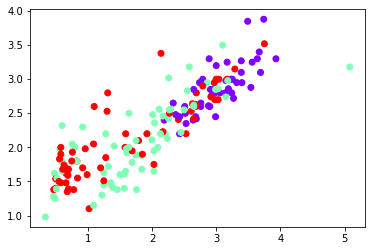

In [225]:
plt.scatter(X[:,5],X[:,4],c=y,cmap="rainbow")

Here we can see there is a lot of outlier so will remove the outlier for better visibility of the clusters

In [226]:
# This is a function for removing the outliers

def outlier_removal(data:pd.DataFrame,std_multi:int=3, inplace:bool=False):
    df_copy = data if inplace else data.copy()
    data_shape_before = data.shape
    print('Before outlier removal   : ', data_shape_before)
    for name in df_copy.select_dtypes(exclude="object").columns:
        upper_limit = df_copy[name].mean() + std_multi*df_copy[name].std()
        lower_limit = df_copy[name].mean() - std_multi*df_copy[name].std()
        df_copy.drop(df_copy[(lower_limit>df_copy[name]) | (df_copy[name]>upper_limit)].index, inplace = True)
    print('After removal of outliers: ' ,df_copy.shape)

In [227]:
outlier_removal(data= df,std_multi=2.5, inplace=True)

Before outlier removal   :  (178, 14)
After removal of outliers:  (159, 14)


In [228]:
new_df = preprocessing.StandardScaler().fit_transform(df)
new_df = pd.DataFrame(df1, columns=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 'Flavanoids', 
                                       'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline','Customer_Segment'])

In [229]:
new_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,1.579596,-0.575957,0.244075,-1.404677,2.396713,0.918185,1.149286,-0.692605,1.613230,0.332575,0.408753,1.834053,1.140765,-1.194568
1,0.206584,0.072844,1.289583,-0.312237,0.217559,0.918185,1.341478,-0.520218,2.682495,0.351344,0.362401,0.782885,1.551886,-1.194568
2,0.309239,0.302420,2.160839,0.561716,1.642391,0.918185,0.754226,0.255524,0.646780,-0.286785,0.408753,0.446511,0.010181,-1.194568
3,1.541100,-0.526049,0.331201,-1.550336,1.139509,1.703018,1.501637,-0.175444,0.955221,0.853401,0.455105,0.334386,2.459780,-1.194568
4,1.784906,-0.416252,0.331201,-1.768824,-0.201509,0.417228,0.572712,-0.520218,0.975784,0.149582,0.316049,1.357523,1.911618,-1.194568


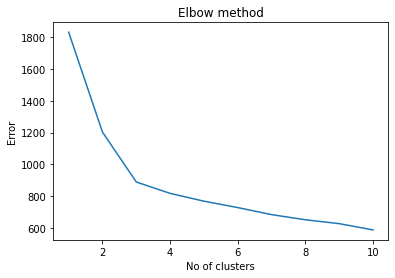

In [230]:
X = new_df.iloc[:,1:].values

Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [231]:
K = KMeans(n_clusters = 3).fit(X)
y = K.fit_predict(X)

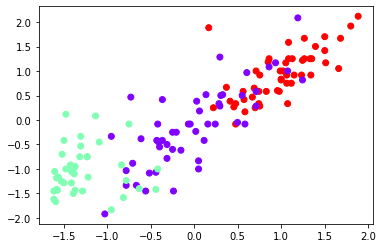

In [190]:
plt.scatter(X[:,5],X[:,4],c=y,cmap="rainbow")

This is more clear than the previous but the shape of the dataset obviously decreased.

**AFFINITY PROPAGATION**

In [241]:
K = AffinityPropagation(damping=0.9, preference=-50).fit(X)
y = K.fit_predict(X)

/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


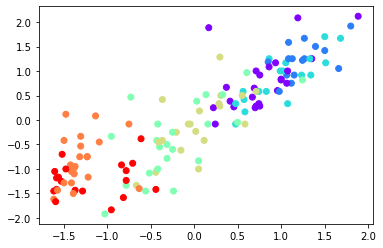

In [242]:
plt.scatter(X[:,5],X[:,4],c=y,cmap="rainbow")

**MEAN SHIFT**

In [243]:
estimate_bandwidth(new_df, quantile=0.057, n_samples=None, random_state=0, n_jobs=None)

2.735794290892978

In [248]:
K = MeanShift(bandwidth=2.7).fit(X)
y = K.fit_predict(X)

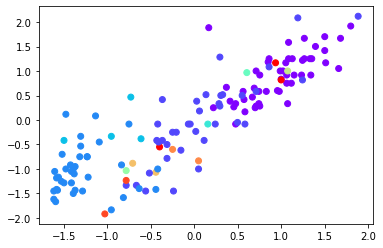

In [249]:
plt.scatter(X[:,5],X[:,4],c=y,cmap="rainbow")

**SPECTRAL CLUSTERING**

In [250]:
K = SpectralClustering(n_clusters=3).fit(X)
y = K.fit_predict(X)

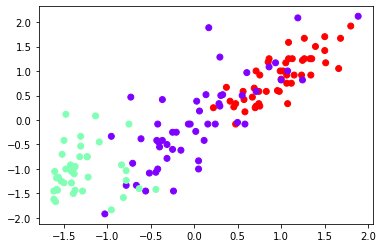

In [251]:
plt.scatter(X[:,5],X[:,4],c=y,cmap="rainbow")

**DBSCAN**

In [252]:
K = DBSCAN(eps=1,min_samples=4).fit(X)
y = K.fit_predict(X)

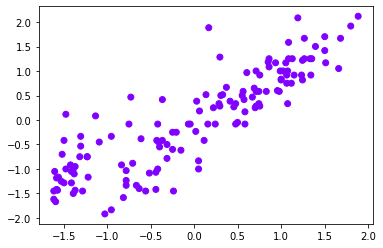

In [253]:
plt.scatter(X[:,5],X[:,4],c=y,cmap="rainbow")

**BIRCH**

In [254]:
K = Birch(n_clusters= 3,threshold=1.5).fit(X)
y = K.fit_predict(X)

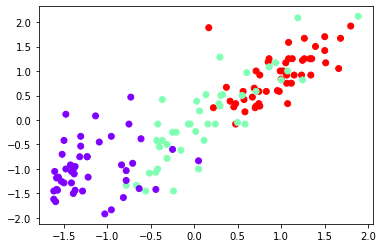

In [255]:
plt.scatter(X[:,5],X[:,4],c=y,cmap="rainbow")

**OPTICS**

In [256]:
K = OPTICS(min_samples=3).fit(X)
y = K.fit_predict(X)

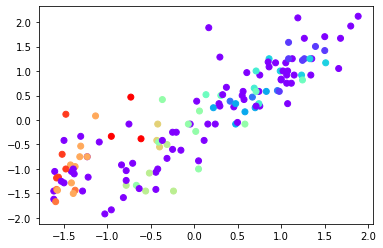

In [257]:
plt.scatter(X[:,5],X[:,4],c=y,cmap="rainbow")

**HEIRARCHICAL CLUSTERING**

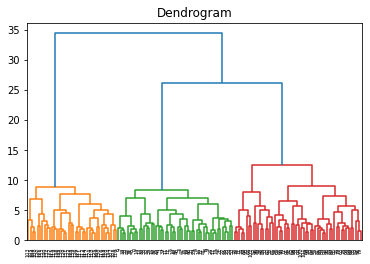

In [260]:
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.show()

In [258]:
K = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y = K.fit_predict(X)

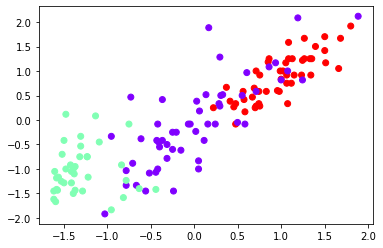

In [259]:
plt.scatter(X[:,5],X[:,4],c=y,cmap="rainbow")

**GUASSIAN MIXTURE**

In [261]:
K = GaussianMixture( n_components=3, covariance_type='full').fit(X)
y = K.fit_predict(X)

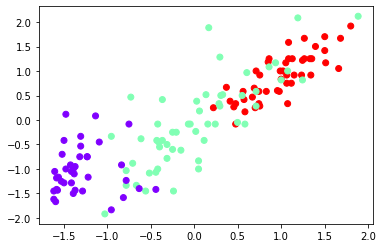

In [262]:
plt.scatter(X[:,5],X[:,4],c=y,cmap="rainbow")